# Test task completed by sytyy00@gmail.com (https://github.com/sytyy00)
Colab - https://colab.research.google.com/drive/1zW9laU-T2yHg4XbgXjKaN6d5sjPcSbUM?usp=sharing


In [0]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import ExtraTreeRegressor, plot_tree

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load Data

In [0]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [0]:
print(data['sex'].value_counts(), end='\n\n')
print(data['smoker'].value_counts(), end='\n\n')
data['region'].value_counts()

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64



southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### Data Processing
Convert categorical data types to binary features

In [0]:
sex_mapping = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex_mapping)

smoker_mapping = {'no': 0, 'yes': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)

region_dummies = pd.get_dummies(data['region'], dummy_na=False)
data = pd.concat([data, region_dummies], axis=1)
data = data.drop(['region'], axis=1)
data.head(10)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
5,31,1,25.740,0,0,3756.62160,0,0,1,0
6,46,1,33.440,1,0,8240.58960,0,0,1,0
7,37,1,27.740,3,0,7281.50560,0,1,0,0
8,37,0,29.830,2,0,6406.41070,1,0,0,0
9,60,1,25.840,0,0,28923.13692,0,1,0,0


#### Analysis Data

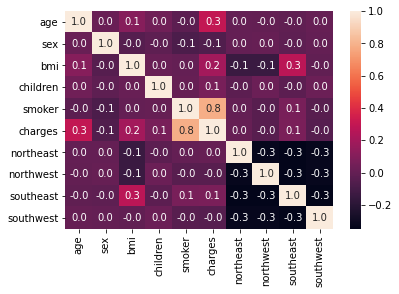

In [0]:
corr_matrix = data.corr()
sn.heatmap(corr_matrix, annot=True, fmt=".1f")

In [0]:
corr_matrix['charges'].sort_values(ascending=False)

charges      1.000000
smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
sex         -0.057292
Name: charges, dtype: float64

A strong correlation is observed only with the fact of smoking.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

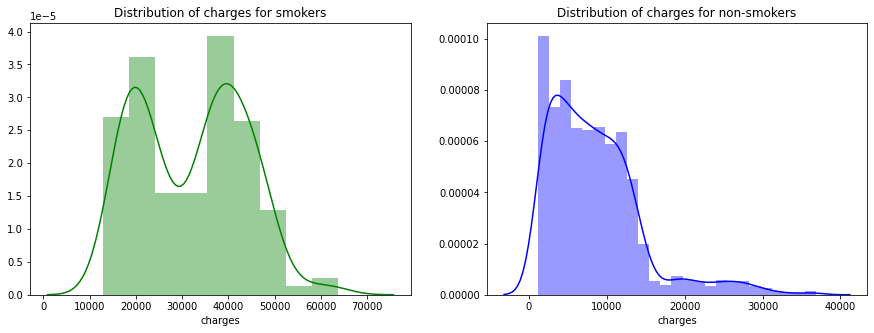

In [0]:
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(121)
sn.distplot(data[(data.smoker == 1)]["charges"], color='g', ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sn.distplot(data[(data.smoker == 0)]['charges'], color='b', ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smokers spend more on insurance.

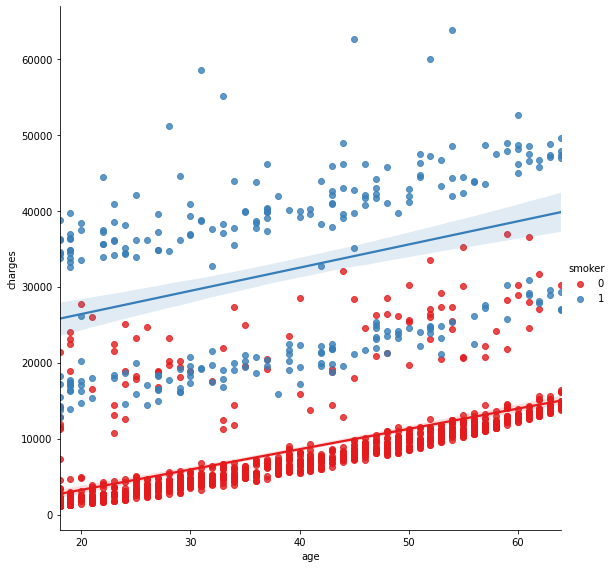

In [0]:
sn.lmplot(data=data, x="age", y="charges", hue="smoker", palette='Set1', height=8)

In non-smokers there costs increase with age. Smoking people have no such dependence.

In [0]:
X = data
X = X.drop(['charges'], axis=1)
y = data['charges']
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.33, random_state=42)

####First, using usual  linear regression

In [0]:
line_model = LinearRegression().fit(X_train, y_train)
line_predict =  line_model.predict(X_test)
print('MAE =', mean_absolute_error(y_test, line_predict))
print('MSE =', mean_squared_error(y_test, line_predict))

MAE = 4193.463021932147
MSE = 35090225.72562567


In [0]:
pd.DataFrame(line_model.coef_, X.columns, columns=['coefficient'])

,coefficient
age,261.568395
sex,-121.123686
bmi,347.097290
children,371.762169
smoker,23700.983287
northeast,507.500691
northwest,167.882295
southeast,-378.998890
southwest,-296.384097


Smoking is the most influential factor.

#### Using ExtraTreeRegressor

In [0]:
tree_model = ExtraTreeRegressor().fit(X_train, y_train)
tree_predit =  tree_model.predict(X_test)
print('MAE =', mean_absolute_error(y_test, tree_predit))
print('MSE =', mean_squared_error(y_test, tree_predit))

MAE = 3020.8505521923075
MSE = 38878230.19009047


#### Using NN

In [0]:
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [0]:
model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=1)

Epoch 1/200
18/18 [==============================] - 0s 2ms/step - loss: 325393184.0000 - mae: 13375.0000
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 324843296.0000 - mae: 13355.8779
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 324229376.0000 - mae: 13333.9541
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 323458144.0000 - mae: 13306.8887
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 322495296.0000 - mae: 13273.3652
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 321354144.0000 - mae: 13232.5244
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 319981984.0000 - mae: 13183.8701
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 318385728.0000 - mae: 13126.7354
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 316512768.0000 - mae: 13061.1006
Epoch 10/200
18/18 [==========================

In [0]:
mse, mae = model.evaluate(X_test, y_test, verbose=0)
model_predict = model.predict(X_test)
print('MAE =', mae)
print('MAE =', mse)

MAE = 8969.853515625
MAE = 123304248.0


####Conclusion
LinearRegression based model shows better convergence. You can, of course, apply data normalization or standardization, but on such a small data set it will not work. The most influential factors are patient smoking.